> **ALGORITMO DE MACHINE LEARNING: ARBOL DE DECISIÓN**
---

Aplicación del algoritmo de Árbol de Decisión para obtener el valor de la ganancia de retroalimentación de la velocidad angular del motor en base a la inercia total sumado de la inercia del motor y la carga.

> Importación y Análisis de Data
---

In [ ]:
#IMPORTAR LIBRERÍA
import pandas as pd                                     # LIBRERÍA PARA DATAFRAMES
import numpy as np                                      # LIBRERÍA PARA MATRICES
import os                                               # LIBRERÍA PARA OPERACIONES CON EL SISTEMA OPERATIVO
import matplotlib.pyplot as plt                         # LIBRERÍA PARA GRÁFICAS 2D
from sklearn import model_selection                     # LIBRERÍA PARA SEPARAR DATA EN ENTRENAMIENTO Y VALIDACIÓN
from sklearn.tree import DecisionTreeRegressor          # LIBRERÍA PARA IMPLEMENTAR REGRESIÓN POR ARBOL DE DECISIÓN
from sklearn.tree import export_graphviz                # LIBRERÍA PARA EXPORTAR ÁRBOL DE DECISIÓN (ARCHIVO DOT)
from graphviz import Source                             # LIBRERÍA PARA MOSTRAR ÁRBOL DE DECISIÓN (ARCHIVO DOT)
from sklearn.model_selection import KFold               # LIBRERÍA PARA DIVIDIR LA DATA EN N-FOLD O SUBCONJUNTOS DE TESTING DIFERENTES
from sklearn.model_selection import cross_val_score     # LIBRERÍA PARA OBTENER LA CORRELACIÓN POR VALIDACIÓN CRUZADA
from sklearn.metrics import mean_squared_error          # LIBRERÍA PARA HALLAR EL ERROR CUADRÁTICO MEDIO
from sklearn.externals import joblib                    # LIBRERÍA PARA EXPORTAR MODELO DE MACHINE LEARNING

from google.colab import drive          # LIBRERÍA PARA IMPORTAR DESDE GOOGLE DRIVE

In [ ]:
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#LEER ARCHIVO EXCEL (.xlsx)
mainpath = "drive/My Drive/DATASET"
filenameDatos = "PP_CONTROL_MOTOR_DC/Dataset_Motor.xlsx"
fullpathDatos = os.path.join(mainpath,filenameDatos)

data = pd.read_excel(fullpathDatos)

#Mostrar Datos
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1995,0.117811,2.026651,27828.389339
1996,0.117859,1.415655,13640.427254
1997,0.117906,2.026651,27850.673436
1998,0.117953,2.026651,27861.815484


In [ ]:
data = data[data["Inercia_Total"] <= 0.08]
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1189,0.079797,0.229605,259.688392
1190,0.079844,0.229605,259.842612
1191,0.079891,0.229605,259.996832
1192,0.079938,0.229605,260.151053


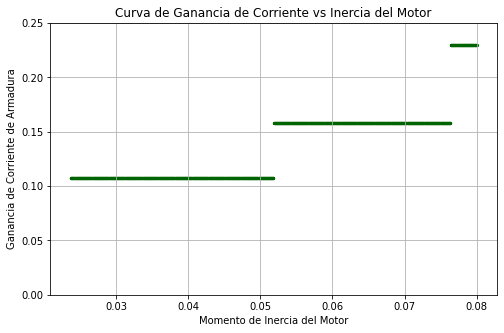

In [ ]:
#GRÁFICA DE LA GANANCIA DE LA CORRIENTE VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Corriente, c = "darkgreen", s = 5)
plt.ylim([0,0.25])
plt.title("Curva de Ganancia de Corriente vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia de Corriente de Armadura")
plt.grid()
plt.show()

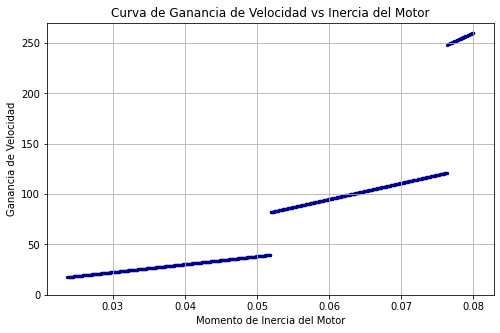

In [ ]:
#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Velocidad, c = "darkblue", s = 5)
plt.ylim([0,270])
plt.title("Curva de Ganancia de Velocidad vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.show()

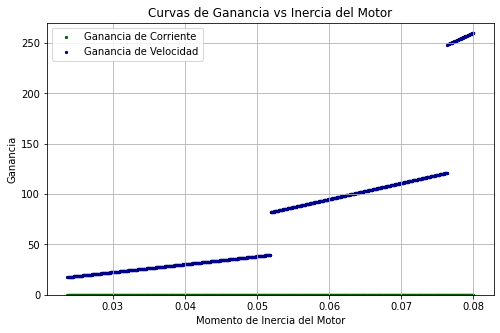

In [ ]:
#GRÁFICA DE LA GANANCIA VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Corriente, c = "darkgreen", label = "Ganancia de Corriente", s = 5)
plt.scatter(data.Inercia_Total, data.Ganancia_Velocidad, c = "darkblue", label = "Ganancia de Velocidad", s = 5)
plt.ylim([0,270])
plt.title("Curvas de Ganancia vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia")
plt.grid()
plt.legend()
plt.show()

> # 1. GANANCIA VELOCIDAD




> Separar Datos en Conjuntos de Entrenamiento y Validación
---

In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristica = ["Inercia_Total"]
objetivo = ["Ganancia_Velocidad"]

X = data[caracteristica]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.25, random_state = 0)

> Entrenamiento del Árbol de Regresión y Validación de sus Parámetros
---

Las variable predictora es:  Inercia_Total
Para una profundidad de  1  el mse es:  1361.6863170313823
Para una profundidad de  2  el mse es:  110.9896815715829
Para una profundidad de  3  el mse es:  50.92392403493359
Para una profundidad de  4  el mse es:  35.27572181166837
Para una profundidad de  5  el mse es:  31.0262456909989
Para una profundidad de  6  el mse es:  29.784107626797983
Para una profundidad de  7  el mse es:  29.396873667815946
Para una profundidad de  8  el mse es:  29.396690855346964
Para una profundidad de  9  el mse es:  29.396690855346964
Para una profundidad de  10  el mse es:  29.396690855346964


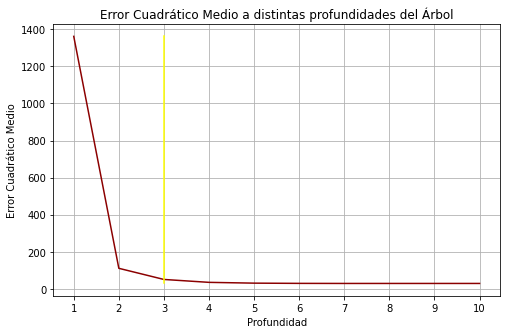

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS PROFUNDIDADES DE ÁRBOL

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DE LA PROFUNDIDAD DEL ÁRBOL
profundidadMinima = 1
profundidadMaxima = 10

errorCuadraticoMedioList = []
profundidad = np.array(range(profundidadMinima,profundidadMaxima+1))

for i in range(profundidadMinima,profundidadMaxima+1):

  tree = DecisionTreeRegressor(criterion = "mse", max_depth = i, min_samples_split = 10, min_samples_leaf = 10, random_state = 0) 
  tree.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 200 EN 200, PUES TENEMOS 2000 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(tree, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para una profundidad de ", i, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(profundidad, errorCuadraticoMedio, c = "darkred")
plt.plot(3*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas profundidades del Árbol")
plt.xlabel("Profundidad")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(profundidad)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total
Para un corte con un mínimo de  10  muestras, el mse es:  51.36008163988011
Para un corte con un mínimo de  30  muestras, el mse es:  51.36008163988011
Para un corte con un mínimo de  50  muestras, el mse es:  51.36008163988011
Para un corte con un mínimo de  70  muestras, el mse es:  51.81520094370021
Para un corte con un mínimo de  90  muestras, el mse es:  52.5879081558255
Para un corte con un mínimo de  110  muestras, el mse es:  52.5879081558255
Para un corte con un mínimo de  130  muestras, el mse es:  52.5879081558255
Para un corte con un mínimo de  150  muestras, el mse es:  52.5879081558255
Para un corte con un mínimo de  170  muestras, el mse es:  52.5879081558255
Para un corte con un mínimo de  190  muestras, el mse es:  52.5879081558255
Para un corte con un mínimo de  210  muestras, el mse es:  52.5879081558255
Para un corte con un mínimo de  230  muestras, el mse es:  52.5879081558255
Para un corte con un mínimo de  250  muestras,

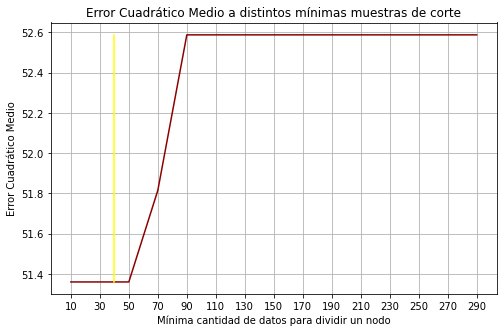

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES MÍNIMAS DE MUESTRAS PARA CORTAR UN NODO EN UNA DECISIÓN

print("Las variable predictora es: ", caracteristica[0])

profundidadAceptada = 3

# PRUEBA DEL NÚMERO DE DATOS NECESARIOS PARA PODER DIVIDIR UN NODO EN UNA DECISIÓN
samplesSplitMinimo = 10
samplesSplitMaximo = 300+1
samplesSplitPaso = 20

errorCuadraticoMedioList = []
samplesSplit = np.array(range(samplesSplitMinimo,samplesSplitMaximo,samplesSplitPaso))

for sampleSplit in range(samplesSplitMinimo,samplesSplitMaximo,samplesSplitPaso):

  tree = DecisionTreeRegressor(criterion = "mse", max_depth = profundidadAceptada, min_samples_split = sampleSplit, min_samples_leaf = 30, random_state = 0)
  tree.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 200 EN 200, PUES TENEMOS 2000 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(tree, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un corte con un mínimo de ", sampleSplit, " muestras, el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(samplesSplit, errorCuadraticoMedio, c = "darkred")
plt.plot(40*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintos mínimas muestras de corte")
plt.xlabel("Mínima cantidad de datos para dividir un nodo")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(samplesSplit)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total
Para nodos finales con un mínimo de  10  muestras, el mse es:  51.36008163988011
Para nodos finales con un mínimo de  20  muestras, el mse es:  51.36008163988011
Para nodos finales con un mínimo de  30  muestras, el mse es:  51.36008163988011
Para nodos finales con un mínimo de  40  muestras, el mse es:  52.5879081558255
Para nodos finales con un mínimo de  50  muestras, el mse es:  52.5879081558255
Para nodos finales con un mínimo de  60  muestras, el mse es:  52.5879081558255
Para nodos finales con un mínimo de  70  muestras, el mse es:  50.52977997463934
Para nodos finales con un mínimo de  80  muestras, el mse es:  195.6553734611042
Para nodos finales con un mínimo de  90  muestras, el mse es:  272.0158327090898
Para nodos finales con un mínimo de  100  muestras, el mse es:  381.28043714592985
Para nodos finales con un mínimo de  110  muestras, el mse es:  461.09592256428243
Para nodos finales con un mínimo de  120  muestras, el mse es:  5

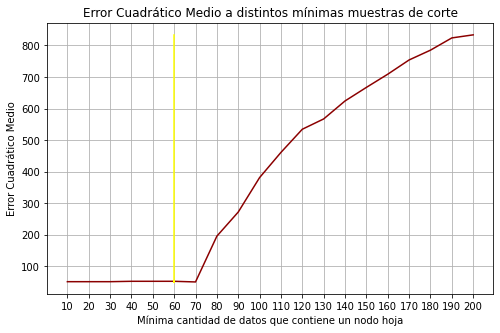

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES MÍNIMAS DE MUESTRAS QUE ESTARÁN EN UN NODO HOJA (NODO DE LA ÚLTIMA CAPA DE PROFUNDIDAD O NODO FINAL)

print("Las variable predictora es: ", caracteristica[0])

profundidadAceptada = 3
sampleSplitAceptado = 40

# PRUEBA DEL NÚMERO DE DATOS NECESARIOS PARA PODER DIVIDIR UN NODO EN UNA DECISIÓN
samplesLeafMinimo = 10
samplesLeafMaximo = 200+1
samplesLeafPaso = 10

errorCuadraticoMedioList = []
samplesLeaf = np.array(range(samplesLeafMinimo,samplesLeafMaximo,samplesLeafPaso))

for sampleLeaf in range(samplesLeafMinimo,samplesLeafMaximo,samplesLeafPaso):

  tree = DecisionTreeRegressor(criterion = "mse", max_depth = profundidadAceptada, min_samples_split = sampleSplitAceptado, min_samples_leaf = sampleLeaf, random_state = 0)
  tree.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 200 EN 200, PUES TENEMOS 2000 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(tree, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para nodos finales con un mínimo de ", sampleLeaf, " muestras, el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(samplesLeaf, errorCuadraticoMedio, c = "darkred")
plt.plot(60*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintos mínimas muestras de corte")
plt.xlabel("Mínima cantidad de datos que contiene un nodo hoja")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(samplesLeaf)
plt.grid()
plt.show()

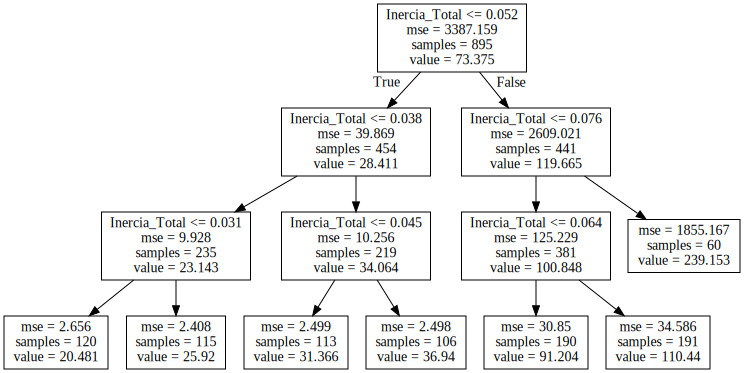

In [ ]:
# ENTRENAMOS EL ÁRBOL CON EL MÍNIMO ERROR CUADRÁTICO ES UNA DE PROFUNDIDAD 7, MIN_SAMPLES_SPLIT = 100 Y MIN_SAMPLES_LEAF = 30

profundidadAceptada = 3
sampleSplitAceptado = 40
sampleLeafAceptado = 60

tree = DecisionTreeRegressor(criterion = "mse", max_depth = profundidadAceptada, min_samples_split = sampleSplitAceptado, min_samples_leaf = sampleLeafAceptado, random_state = 0) 
tree.fit(X_train, Y_train)

#GUARDAR ARCHIVO DOT CON LA INFORMACIÓN PARA GRAFICAR
filenameArbol = "PP_CONTROL_MOTOR_DC/Motor_Arbol_Grafico_Velocidad.dot"
fullpathArbol = os.path.join(mainpath,filenameArbol)

with open(fullpathArbol, "w") as dotfile_b:
  export_graphviz(tree, out_file = dotfile_b, feature_names = caracteristica)
  dotfile_b.close()

file = open(fullpathArbol, "r")
text = file.read()
Source(text)

> Validación del Modelo de Árbol de Regresión
---

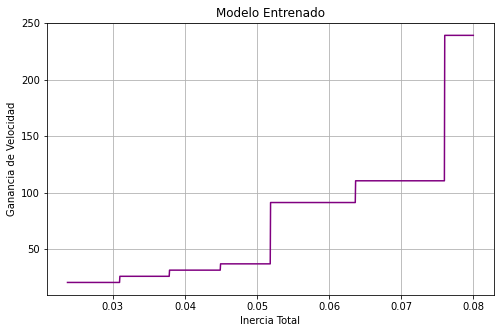

In [ ]:
Y_predtotal = tree.predict(X)
#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(X, Y_predtotal, c = "purple")
plt.title("Modelo Entrenado")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.show()

In [ ]:
# ERROR CUADRÁTICO MEDIO
Y_pred = tree.predict(X_test)
MSE = mean_squared_error(Y_test,Y_pred)

# COEFICIENTES DE DETERMINACIÓN R2 SCORE
OOBS = tree.score(X_test,Y_test)
OOBS = OOBS*100

# ERROR ESTÁNDAR RESIDUAL
SSD = np.sum((Y_pred - np.transpose(Y_test.values))**2) #SSD                    #DIFERENCIA CUADRADO ENTRE LOS DATOS Y EL RESULTADO PREDICHO
RSE_prev = np.sqrt(SSD/(len(Y_test.values)-len(caracteristica)-1))   #HALLAR ERROR RESPECTO AL PROMEDIO
promedio = np.mean(Y_test.values)
RSE = RSE_prev/promedio

print("El error cuadrático medio es: ", MSE)
print("El coeficiente de determinación R2 es: ", OOBS, "%")
print("El error estándar residual es: ", RSE)

El error cuadrático medio es:  78.20581501366775
El coeficiente de determinación R2 es:  98.02968010793174 %
El error estándar residual es:  0.11157367327491642


> Exportar Modelo de Árbol de Regresión
---

In [ ]:
filenameModelo = "PP_CONTROL_MOTOR_DC/Motor_Regresion_Arbol_Velocidad.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(tree,fullpathModelo)

['drive/My Drive/DATASET/PP_CONTROL_MOTOR_DC/Motor_Regresion_Arbol_Velocidad.pkl']

> # 2. GANANCIA CORRIENTE


> Separar Datos en Conjuntos de Entrenamiento y Validación
---

In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristica = ["Inercia_Total"]
objetivo = ["Ganancia_Corriente"]

X = data[caracteristica]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.25, random_state = 0)

> Entrenamiento del Árbol de Regresión y Validación de sus Parámetros
---

Las variable predictora es:  Inercia_Total
Para una profundidad de  1  el mse es:  0.0002928852803493145
Para una profundidad de  2  el mse es:  1.0812469710962126e-05
Para una profundidad de  3  el mse es:  1.0812469710962126e-05
Para una profundidad de  4  el mse es:  1.0812469710962126e-05
Para una profundidad de  5  el mse es:  1.0812469710962126e-05
Para una profundidad de  6  el mse es:  1.0812469710962126e-05
Para una profundidad de  7  el mse es:  1.0812469710962126e-05
Para una profundidad de  8  el mse es:  1.0812469710962126e-05
Para una profundidad de  9  el mse es:  1.0812469710962126e-05
Para una profundidad de  10  el mse es:  1.0812469710962126e-05


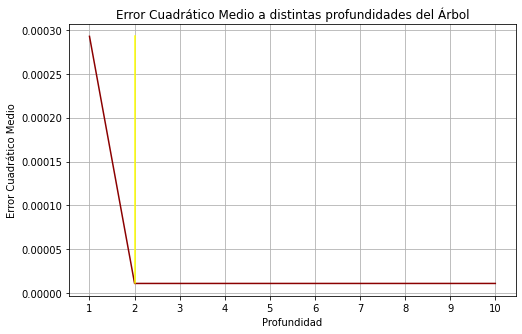

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS PROFUNDIDADES DE ÁRBOL

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DE LA PROFUNDIDAD DEL ÁRBOL
profundidadMinima = 1
profundidadMaxima = 10

errorCuadraticoMedioList = []
profundidad = np.array(range(profundidadMinima,profundidadMaxima+1))

for i in range(profundidadMinima,profundidadMaxima+1):

  tree = DecisionTreeRegressor(criterion = "mse", max_depth = i, min_samples_split = 10, min_samples_leaf = 10, random_state = 0) 
  tree.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 200 EN 200, PUES TENEMOS 2000 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(tree, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para una profundidad de ", i, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(profundidad, errorCuadraticoMedio, c = "darkred")
plt.plot(2*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas profundidades del Árbol")
plt.xlabel("Profundidad")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(profundidad)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total
Para un corte con un mínimo de  10  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  20  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  30  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  40  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  50  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  60  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  70  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  80  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  90  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  100  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  110  muestras, el mse es:  1.0812469710962126e-05
Para un corte con un mínimo de  120  muestras, el mse es:  1.081

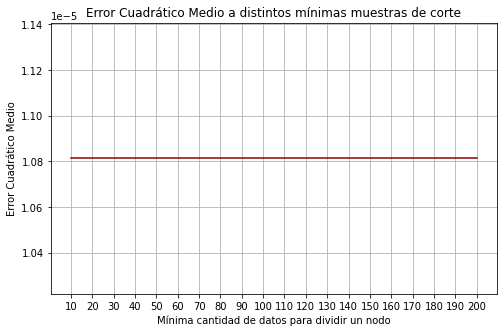

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES MÍNIMAS DE MUESTRAS PARA CORTAR UN NODO EN UNA DECISIÓN

print("Las variable predictora es: ", caracteristica[0])

profundidadAceptada = 2

# PRUEBA DEL NÚMERO DE DATOS NECESARIOS PARA PODER DIVIDIR UN NODO EN UNA DECISIÓN
samplesSplitMinimo = 10
samplesSplitMaximo = 200+1
samplesSplitPaso = 10

errorCuadraticoMedioList = []
samplesSplit = np.array(range(samplesSplitMinimo,samplesSplitMaximo,samplesSplitPaso))

for sampleSplit in range(samplesSplitMinimo,samplesSplitMaximo,samplesSplitPaso):

  tree = DecisionTreeRegressor(criterion = "mse", max_depth = profundidadAceptada, min_samples_split = sampleSplit, min_samples_leaf = 30, random_state = 0)
  tree.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 200 EN 200, PUES TENEMOS 2000 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(tree, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para un corte con un mínimo de ", sampleSplit, " muestras, el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(samplesSplit, errorCuadraticoMedio, c = "darkred")
plt.plot(10*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintos mínimas muestras de corte")
plt.xlabel("Mínima cantidad de datos para dividir un nodo")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(samplesSplit)
plt.grid()
plt.show()

Las variable predictora es:  Inercia_Total
Para nodos finales con un mínimo de  1  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  2  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  3  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  4  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  5  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  6  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  7  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  8  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  9  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  10  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales con un mínimo de  11  muestras, el mse es:  1.0812469710962126e-05
Para nodos finales c

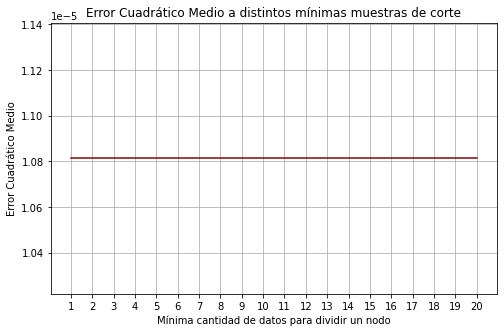

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES MÍNIMAS DE MUESTRAS QUE ESTARÁN EN UN NODO HOJA (NODO DE LA ÚLTIMA CAPA DE PROFUNDIDAD O NODO FINAL)

print("Las variable predictora es: ", caracteristica[0])

profundidadAceptada = 2
sampleSplitAceptado = 10

# PRUEBA DEL NÚMERO DE DATOS NECESARIOS PARA PODER DIVIDIR UN NODO EN UNA DECISIÓN
samplesLeafMinimo = 1
samplesLeafMaximo = 20+1
samplesLeafPaso = 1

errorCuadraticoMedioList = []
samplesLeaf = np.array(range(samplesLeafMinimo,samplesLeafMaximo,samplesLeafPaso))

for sampleLeaf in range(samplesLeafMinimo,samplesLeafMaximo,samplesLeafPaso):

  tree = DecisionTreeRegressor(criterion = "mse", max_depth = profundidadAceptada, min_samples_split = sampleSplitAceptado, min_samples_leaf = sampleLeaf, random_state = 0)
  tree.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 200 EN 200, PUES TENEMOS 2000 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(tree, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para nodos finales con un mínimo de ", sampleLeaf, " muestras, el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(samplesLeaf, errorCuadraticoMedio, c = "darkred")
plt.plot(15*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintos mínimas muestras de corte")
plt.xlabel("Mínima cantidad de datos para dividir un nodo")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(samplesLeaf)
plt.grid()
plt.show()

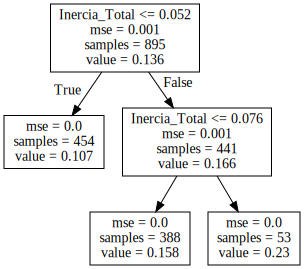

In [ ]:
# ENTRENAMOS EL ÁRBOL CON EL MÍNIMO ERROR CUADRÁTICO ES UNA DE PROFUNDIDAD 7, MIN_SAMPLES_SPLIT = 100 Y MIN_SAMPLES_LEAF = 30

profundidadAceptada = 2
sampleSplitAceptado = 10
sampleLeafAceptado = 2

tree = DecisionTreeRegressor(criterion = "mse", max_depth = profundidadAceptada, min_samples_split = sampleSplitAceptado, min_samples_leaf = sampleLeafAceptado, random_state = 0) 
tree.fit(X_train, Y_train)

#GUARDAR ARCHIVO DOT CON LA INFORMACIÓN PARA GRAFICAR
filenameArbol = "PP_CONTROL_MOTOR_DC/Motor_Arbol_Grafico_Corriente.dot"
fullpathArbol = os.path.join(mainpath,filenameArbol)

with open(fullpathArbol, "w") as dotfile_b:
  export_graphviz(tree, out_file = dotfile_b, feature_names = caracteristica)
  dotfile_b.close()

file = open(fullpathArbol, "r")
text = file.read()
Source(text)

> Validación del Modelo de Árbol de Regresión
---

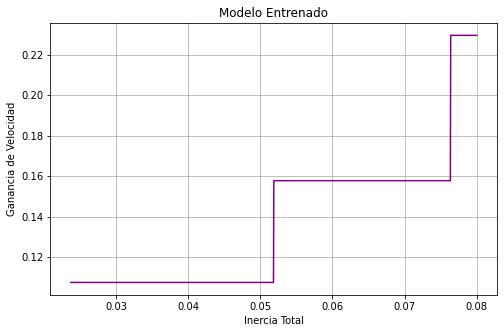

In [ ]:
Y_predtotal = tree.predict(X)
#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(X, Y_predtotal, c = "purple")
plt.title("Modelo Entrenado")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.show()

In [ ]:
# ERROR CUADRÁTICO MEDIO
Y_pred = tree.predict(X_test)
MSE = mean_squared_error(Y_test,Y_pred)

# COEFICIENTES DE DETERMINACIÓN R2 SCORE
OOBS = tree.score(X_test,Y_test)
OOBS = OOBS*100

# ERROR ESTÁNDAR RESIDUAL
SSD = np.sum((Y_pred - np.transpose(Y_test.values))**2) #SSD                    #DIFERENCIA CUADRADO ENTRE LOS DATOS Y EL RESULTADO PREDICHO
RSE_prev = np.sqrt(SSD/(len(Y_test.values)-len(caracteristica)-1))   #HALLAR ERROR RESPECTO AL PROMEDIO
promedio = np.mean(Y_test.values)
RSE = RSE_prev/promedio

print("El error cuadrático medio es: ", MSE)
print("El coeficiente de determinación R2 es: ", OOBS, "%")
print("El error estándar residual es: ", RSE)

El error cuadrático medio es:  4.144793601318798e-12
El coeficiente de determinación R2 es:  99.9999996789793 %
El error estándar residual es:  1.4651253149084593e-05


> Exportar Modelo de Árbol de Regresión
---

In [ ]:
filenameModelo = "PP_CONTROL_MOTOR_DC/Motor_Regresion_Arbol_Corriente.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(tree,fullpathModelo)

['drive/My Drive/DATASET/PP_CONTROL_MOTOR_DC/Motor_Regresion_Arbol_Corriente.pkl']